In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
class EpsilonGreedyBandit:
    def __init__(self, n_arms, epsilon):
        """
        Initialize the EpsilonGreedyBandit class.

        Parameters:
        - n_arms (int): Number of arms in the bandit
        - epsilon (float): Probability of exploration [1-epsilon which is the probability of exploitation]

        Attributes:
        - counts (np.ndarray): Array to keep track of how many times each arm has been pulled.
        - values (np.ndarray): Array to store the estimated average reward for each arm.
        """
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.counts = np.zeros(n_arms)  # Number of times each arm has been pulled
        self.values = np.zeros(n_arms)  # Average reward for each arm

    def select_arm(self):
        """
        Select an arm using the epsilon-greedy strategy.

        Returns:
        - chosen_arm (int): The index of the arm selected.
        """
        if np.random.rand() < self.epsilon:
            # Exploration: choose a random arm
            return np.random.randint(0, self.n_arms)
        else:
            # Exploitation: choose the best-known arm
            return np.argmax(self.values)

    def update(self, chosen_arm, reward):
        """
        Update the counts and estimated values for the chosen arm based on the received reward.

        Parameters:
        - chosen_arm (int): The index of the arm that was pulled.
        - reward (int): The reward received after pulling the chosen arm (1 for success, 0 for failure) [Discreate action values].
        """
        # Update counts and values
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        # Incremental update of the average reward
        new_value = ((n - 1) / n) * value + (1 / n) * reward
        self.values[chosen_arm] = new_value

def simulate_bandit(n_arms, n_trials, epsilon, true_rewards):
    """
    Simulate the multi-armed bandit problem using the epsilon-greedy strategy.

    Parameters:
    - n_arms (int): Number of arms in the bandit.
    - n_trials (int): Number of trials (i.e., number of times to pull an arm).
    - epsilon (float): Probability of exploration.
    - true_rewards (list of float): The actual reward probabilities for each arm.

    Returns:
    - rewards (np.ndarray): Array of rewards received during the simulation.
    - cumulative_rewards (np.ndarray): Array of cumulative rewards over time.
    - selected_arms (np.ndarray): Array of selected arm indices during the simulation.
    - bandit (EpsilonGreedyBandit): The bandit instance after simulation, containing final counts and values.
    """
    bandit = EpsilonGreedyBandit(n_arms, epsilon)
    rewards = np.zeros(n_trials)
    cumulative_rewards = np.zeros(n_trials)
    selected_arms = np.zeros(n_trials)

    for t in range(n_trials):
        chosen_arm = bandit.select_arm()
        reward = int(np.random.rand() < true_rewards[chosen_arm])
        bandit.update(chosen_arm, reward)
        rewards[t] = reward
        cumulative_rewards[t] = rewards[:t+1].sum()
        selected_arms[t] = chosen_arm

    return rewards, cumulative_rewards, selected_arms, bandit

In [8]:
# Parameters
n_arms = 3 # Machines in the casino
n_trials = 1000
epsilon = 0.1  # 10% exploration and 90% exploitation
true_rewards = [0.1, 0.2, 0.3]  # True probabilities of winning for each arm in the process

In [9]:
# Simulation
rewards, cumulative_rewards, selected_arms, bandit = simulate_bandit(n_arms, n_trials, epsilon, true_rewards)

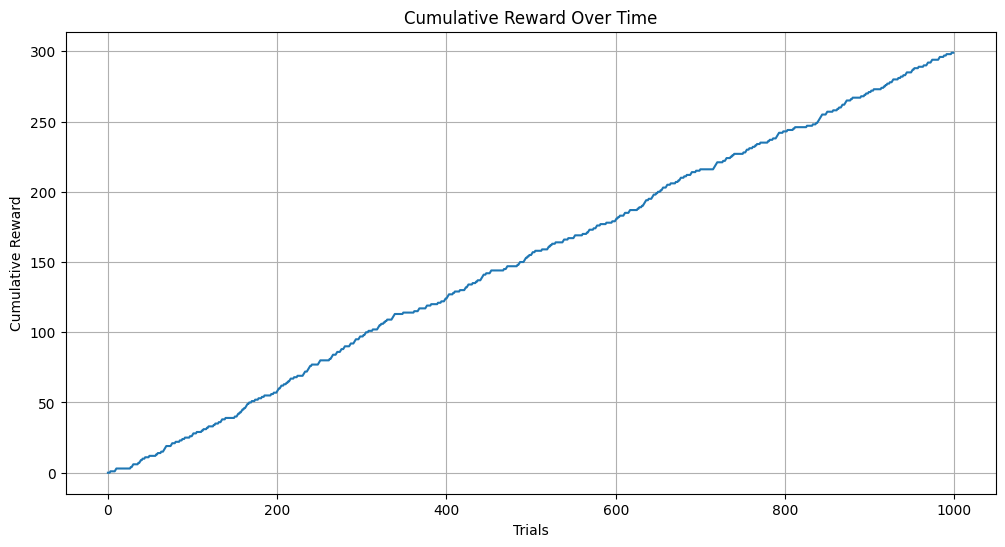

In [11]:
# Cumulative Reward Over Time
'''This shows how the total reward accumulates as we pull more arms.'''
plt.figure(figsize=(12, 6))
plt.plot(cumulative_rewards)
plt.xlabel('Trials')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward Over Time')
plt.grid()
plt.show()

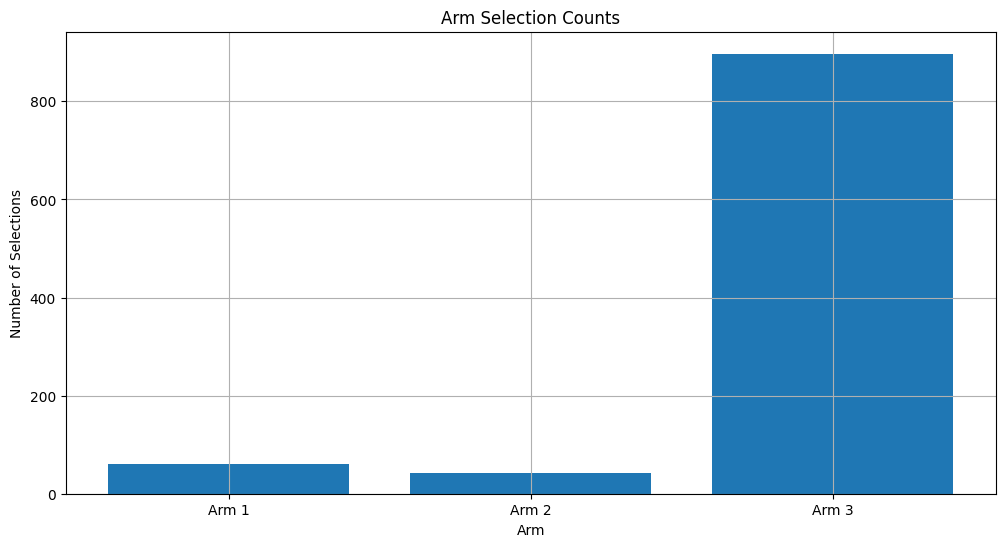

In [12]:
# Arm Selection Counts
'''This will show how often each arm was selected explains the exploration and exploitation problem'''
plt.figure(figsize=(12, 6))
plt.bar(range(n_arms), bandit.counts)
plt.xlabel('Arm')
plt.ylabel('Number of Selections')
plt.title('Arm Selection Counts')
plt.xticks(range(n_arms), ['Arm 1', 'Arm 2', 'Arm 3'])
plt.grid()
plt.show()

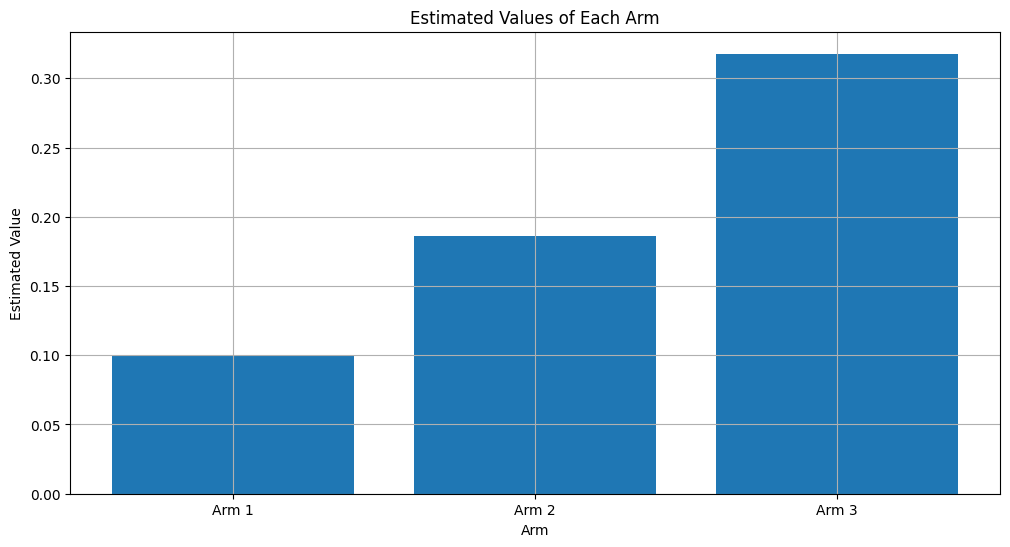

In [13]:
# Estimated Values of Each Arm
'''This shows how the algorithm's estimate of the reward probabilities for each arm evolves over time.'''
plt.figure(figsize=(12, 6))
plt.bar(range(n_arms), bandit.values)
plt.xlabel('Arm')
plt.ylabel('Estimated Value')
plt.title('Estimated Values of Each Arm')
plt.xticks(range(n_arms), ['Arm 1', 'Arm 2', 'Arm 3'])
plt.grid()
plt.show()

### Recommendation System

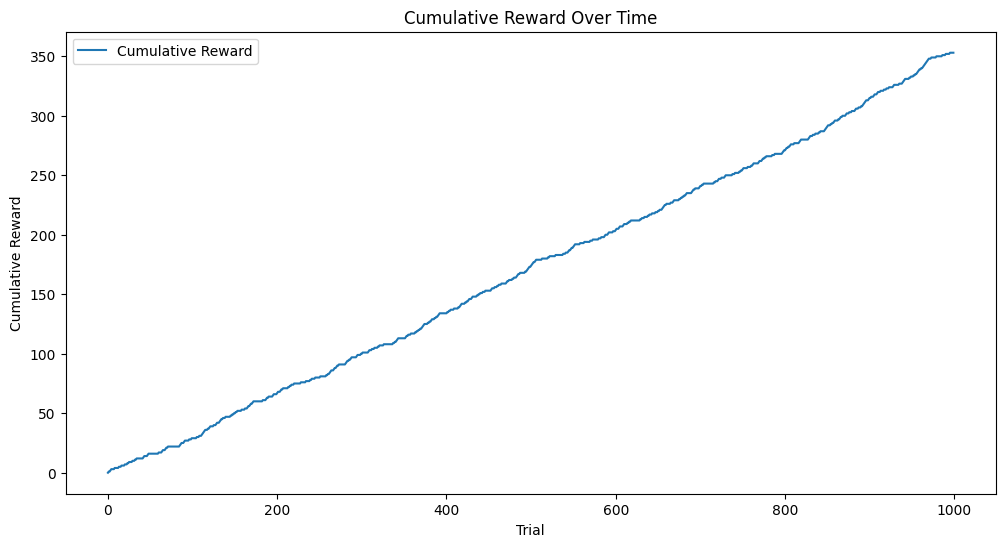

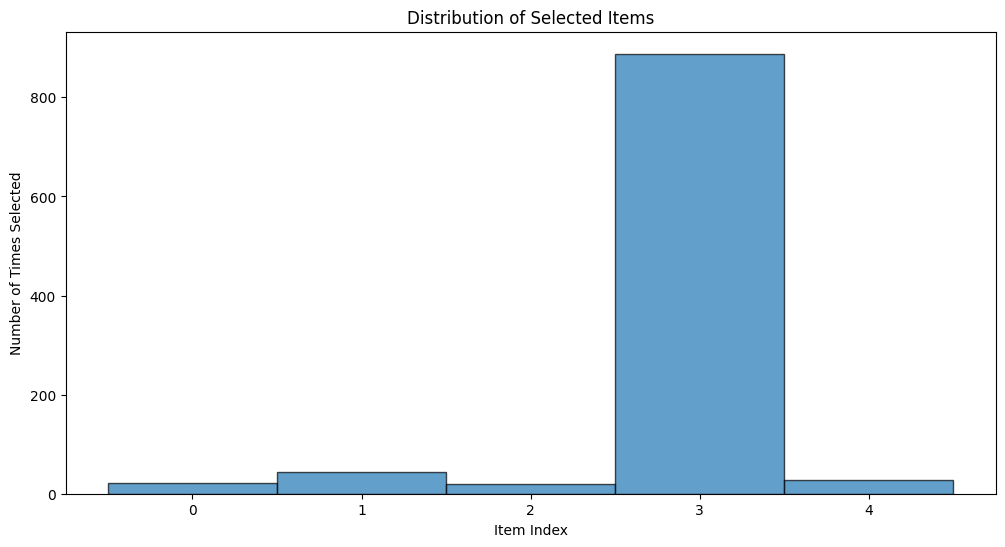

In [16]:
class EpsilonGreedyRecommendation:
    def __init__(self, n_items, epsilon):
        """
        Initialize the EpsilonGreedyRecommendation system.

        Parameters:
        - n_items (int): Number of items (or arms) to recommend.
        - epsilon (float): Probability of exploration (choosing a random item).

        Attributes:
        - counts (np.ndarray): Array to keep track of how many times each item has been recommended.
        - values (np.ndarray): Array to store the estimated average reward for each item.
        """
        self.n_items = n_items
        self.epsilon = epsilon
        self.counts = np.zeros(n_items)  # Initialize the counts for each item to zero
        self.values = np.zeros(n_items)  # Initialize the estimated values for each item to zero

    def select_item(self):
        """
        Select an item using the epsilon-greedy strategy.

        Returns:
        - chosen_item (int): The index of the item selected for recommendation.
        """
        if np.random.rand() < self.epsilon:
            # Exploration: choose a random item
            return np.random.randint(0, self.n_items)
        else:
            # Exploitation: choose the item with the highest estimated value
            return np.argmax(self.values)

    def update(self, chosen_item, reward):
        """
        Update the counts and estimated values for the chosen item based on the received reward.

        Parameters:
        - chosen_item (int): The index of the item that was recommended.
        - reward (int): The reward received after recommending the chosen item (1 for success, 0 for failure).
        """
        # Increment the count for the chosen item
        self.counts[chosen_item] += 1
        n = self.counts[chosen_item]  # Number of times the chosen item has been recommended
        value = self.values[chosen_item]  # Current estimated value of the chosen item
        # Incremental update of the estimated value for the chosen item
        new_value = ((n - 1) / n) * value + (1 / n) * reward
        self.values[chosen_item] = new_value  # Update the estimated value for the chosen item

def simulate_recommendation_system(n_items, n_trials, epsilon, true_rewards):
    """
    Simulate the recommendation system using the epsilon-greedy strategy.

    Parameters:
    - n_items (int): Number of items to recommend.
    - n_trials (int): Number of recommendations to make.
    - epsilon (float): Probability of exploration.
    - true_rewards (list of float): The actual reward probabilities for each item.

    Returns:
    - rewards (np.ndarray): Array of rewards received during the simulation.
    - cumulative_rewards (np.ndarray): Array of cumulative rewards over time.
    - selected_items (np.ndarray): Array of selected item indices during the simulation.
    - recommendation_system (EpsilonGreedyRecommendation): The recommendation system instance after simulation.
    """
    recommendation_system = EpsilonGreedyRecommendation(n_items, epsilon)  # Initialize the recommendation system
    rewards = np.zeros(n_trials)  # Array to store the rewards received in each trial
    cumulative_rewards = np.zeros(n_trials)  # Array to store cumulative rewards over time
    selected_items = np.zeros(n_trials)  # Array to store which item was recommended in each trial

    for t in range(n_trials):
        chosen_item = recommendation_system.select_item()  # Select an item using epsilon-greedy strategy
        reward = int(np.random.rand() < true_rewards[chosen_item])  # Simulate the reward (e.g., user interaction)
        recommendation_system.update(chosen_item, reward)  # Update the system's knowledge with the reward
        rewards[t] = reward  # Store the reward
        cumulative_rewards[t] = rewards[:t+1].sum()  # Update the cumulative reward
        selected_items[t] = chosen_item  # Store the selected item

    return rewards, cumulative_rewards, selected_items, recommendation_system

# Parameters
n_items = 5  # Number of items to recommend
n_trials = 1000  # Number of recommendations to make
epsilon = 0.1  # 10% exploration
true_rewards = [0.05, 0.2, 0.5, 0.35, 0.15]  # True probabilities of user engagement with each item

# Simulation
rewards, cumulative_rewards, selected_items, recommendation_system = simulate_recommendation_system(n_items, n_trials, epsilon, true_rewards)

# Visualization
import matplotlib.pyplot as plt

# Plotting the cumulative rewards
plt.figure(figsize=(12, 6))
plt.plot(cumulative_rewards, label="Cumulative Reward")
plt.xlabel("Trial")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Reward Over Time")
plt.legend()
plt.show()

# Plotting the distribution of selected items
plt.figure(figsize=(12, 6))
plt.hist(selected_items, bins=np.arange(n_items+1)-0.5, edgecolor='black', alpha=0.7)
plt.xlabel("Item Index")
plt.ylabel("Number of Times Selected")
plt.title("Distribution of Selected Items")
plt.xticks(range(n_items))
plt.show()

### Recommendation System Over Items

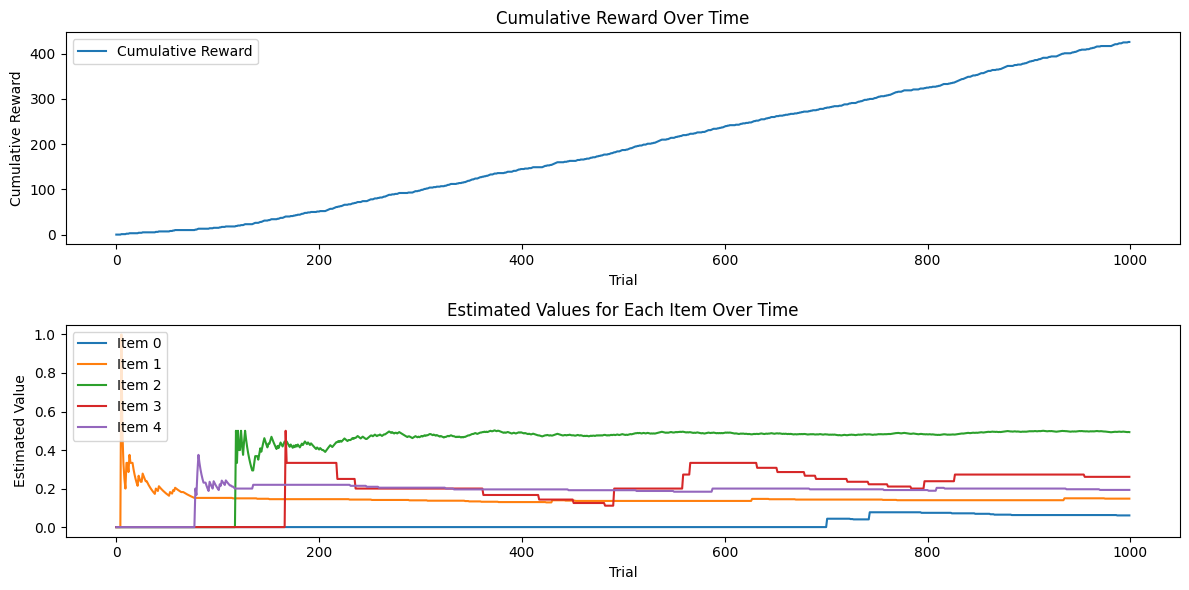

In [17]:
import numpy as np
import matplotlib.pyplot as plt

class EpsilonGreedyRecommendation:
    def __init__(self, n_items, epsilon):
        """
        Initialize the EpsilonGreedyRecommendation system.

        Parameters:
        - n_items (int): Number of items (or arms) to recommend.
        - epsilon (float): Probability of exploration (choosing a random item).

        Attributes:
        - counts (np.ndarray): Array to keep track of how many times each item has been recommended.
        - values (np.ndarray): Array to store the estimated average reward for each item.
        """
        self.n_items = n_items
        self.epsilon = epsilon
        self.counts = np.zeros(n_items)  # Initialize the counts for each item to zero
        self.values = np.zeros(n_items)  # Initialize the estimated values for each item to zero

    def select_item(self):
        """
        Select an item using the epsilon-greedy strategy.

        Returns:
        - chosen_item (int): The index of the item selected for recommendation.
        """
        if np.random.rand() < self.epsilon:
            # Exploration: choose a random item
            return np.random.randint(0, self.n_items)
        else:
            # Exploitation: choose the item with the highest estimated value
            return np.argmax(self.values)

    def update(self, chosen_item, reward):
        """
        Update the counts and estimated values for the chosen item based on the received reward.

        Parameters:
        - chosen_item (int): The index of the item that was recommended.
        - reward (int): The reward received after recommending the chosen item (1 for success, 0 for failure).
        """
        # Increment the count for the chosen item
        self.counts[chosen_item] += 1
        n = self.counts[chosen_item]  # Number of times the chosen item has been recommended
        value = self.values[chosen_item]  # Current estimated value of the chosen item
        # Incremental update of the estimated value for the chosen item
        new_value = ((n - 1) / n) * value + (1 / n) * reward
        self.values[chosen_item] = new_value  # Update the estimated value for the chosen item

def simulate_recommendation_system(n_items, n_trials, epsilon, true_rewards):
    """
    Simulate the recommendation system using the epsilon-greedy strategy.

    Parameters:
    - n_items (int): Number of items to recommend.
    - n_trials (int): Number of recommendations to make.
    - epsilon (float): Probability of exploration.
    - true_rewards (list of float): The actual reward probabilities for each item.

    Returns:
    - rewards (np.ndarray): Array of rewards received during the simulation.
    - cumulative_rewards (np.ndarray): Array of cumulative rewards over time.
    - selected_items (np.ndarray): Array of selected item indices during the simulation.
    - estimated_values_over_time (np.ndarray): Array of estimated values for each item over time.
    - recommendation_system (EpsilonGreedyRecommendation): The recommendation system instance after simulation.
    """
    recommendation_system = EpsilonGreedyRecommendation(n_items, epsilon)  # Initialize the recommendation system
    rewards = np.zeros(n_trials)  # Array to store the rewards received in each trial
    cumulative_rewards = np.zeros(n_trials)  # Array to store cumulative rewards over time
    selected_items = np.zeros(n_trials)  # Array to store which item was recommended in each trial
    estimated_values_over_time = np.zeros((n_trials, n_items))  # Array to store estimated values over time

    for t in range(n_trials):
        chosen_item = recommendation_system.select_item()  # Select an item using epsilon-greedy strategy
        reward = int(np.random.rand() < true_rewards[chosen_item])  # Simulate the reward (e.g., user interaction)
        recommendation_system.update(chosen_item, reward)  # Update the system's knowledge with the reward
        rewards[t] = reward  # Store the reward
        cumulative_rewards[t] = rewards[:t+1].sum()  # Update the cumulative reward
        selected_items[t] = chosen_item  # Store the selected item
        estimated_values_over_time[t] = recommendation_system.values  # Store estimated values for each item

    return rewards, cumulative_rewards, selected_items, estimated_values_over_time, recommendation_system

# Parameters
n_items = 5  # Number of items to recommend
n_trials = 1000  # Number of recommendations to make
epsilon = 0.1  # 10% exploration
true_rewards = [0.05, 0.2, 0.5, 0.35, 0.15]  # True probabilities of user engagement with each item

# Simulation
rewards, cumulative_rewards, selected_items, estimated_values_over_time, recommendation_system = simulate_recommendation_system(n_items, n_trials, epsilon, true_rewards)

# Visualization
plt.figure(figsize=(12, 6))

# Plotting the cumulative rewards
plt.subplot(2, 1, 1)
plt.plot(cumulative_rewards, label="Cumulative Reward")
plt.xlabel("Trial")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Reward Over Time")
plt.legend()

# Plotting the estimated values for each item over time
plt.subplot(2, 1, 2)
for i in range(n_items):
    plt.plot(estimated_values_over_time[:, i], label=f"Item {i}")
plt.xlabel("Trial")
plt.ylabel("Estimated Value")
plt.title("Estimated Values for Each Item Over Time")
plt.legend()

plt.tight_layout()
plt.show()

### UCB Implementation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class UCBBandit:
    def __init__(self,n_arms):
        """
        Initialize the UCBBandit class.

        Parameters:
        - n_arms (int): Number of arms in the bandit

        Attributes:
        - counts (np.ndarray): Array to keep track of how many times each arm has been pulled.
        - values (np.ndarray): Array to store the estimated average reward for each arm.
        - total_counts (int): Total number of arm pulls.
        """
        self.n_arms = n_arms
        self.counts = np.zeros(n_arms)  # Number of times each arm has been pulled
        self.values = np.zeros(n_arms)  # Average reward for each arm
        self.total_counts = 0  # Total number of pulls 

    def select_arm(self):
        """
        Select an arm using the UCB strategy.

        Returns:
        - chosen_arm (int): The index of the arm selected.
        """
        if self.total_counts < self.n_arms:
            # we need to ensure atleast one arm is pulled
            return self.total_counts
        ucb_values = self.values + np.sqrt(2 * np.log(self.total_counts) / (self.counts + 1e-5))
        return np.argmax(ucb_values)

    def update(self, chosen_arm, reward):
        """
        Update the counts and estimated values for the chosen arm based on the received reward.

        Parameters:
        - chosen_arm (int): The index of the arm that was pulled.
        - reward (int): The reward received after pulling the chosen arm (1 for success, 0 for failure) [Discrete action values].
        """
        self.counts[chosen_arm] += 1
        self.total_counts += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        # Incremental update of the average reward
        new_value = ((n - 1) / n) * value + (1 / n) * reward
        self.values[chosen_arm] = new_value

In [4]:
def simulate_bandit_ucb(n_arms, n_trials, true_rewards):
    """
    Simulate the multi-armed bandit problem using the UCB strategy.

    Parameters:
    - n_arms (int): Number of arms in the bandit.
    - n_trials (int): Number of trials (i.e., number of times to pull an arm).
    - true_rewards (list of float): The actual reward probabilities for each arm.

    Returns:
    - rewards (np.ndarray): Array of rewards received during the simulation.
    - cumulative_rewards (np.ndarray): Array of cumulative rewards over time.
    - selected_arms (np.ndarray): Array of selected arm indices during the simulation.
    - bandit (UCBBandit): The bandit instance after simulation, containing final counts and values.
    """
    bandit = UCBBandit(n_arms)
    rewards = np.zeros(n_trials)
    cumulative_rewards = np.zeros(n_trials)
    selected_arms = np.zeros(n_trials)

    for t in range(n_trials):
        chosen_arm = bandit.select_arm()
        reward = int(np.random.rand() < true_rewards[chosen_arm])
        bandit.update(chosen_arm, reward)
        rewards[t] = reward
        cumulative_rewards[t] = rewards[:t+1].sum()
        selected_arms[t] = chosen_arm

    return rewards, cumulative_rewards, selected_arms, bandit

In [5]:
n_arms = 3  # Machines in the casino
n_trials = 1000
true_rewards = [0.1, 0.2, 0.3]  # True probabilities of winning for each arm in the process

In [6]:
# Simulation
rewards, cumulative_rewards, selected_arms, bandit = simulate_bandit_ucb(n_arms, n_trials, true_rewards)

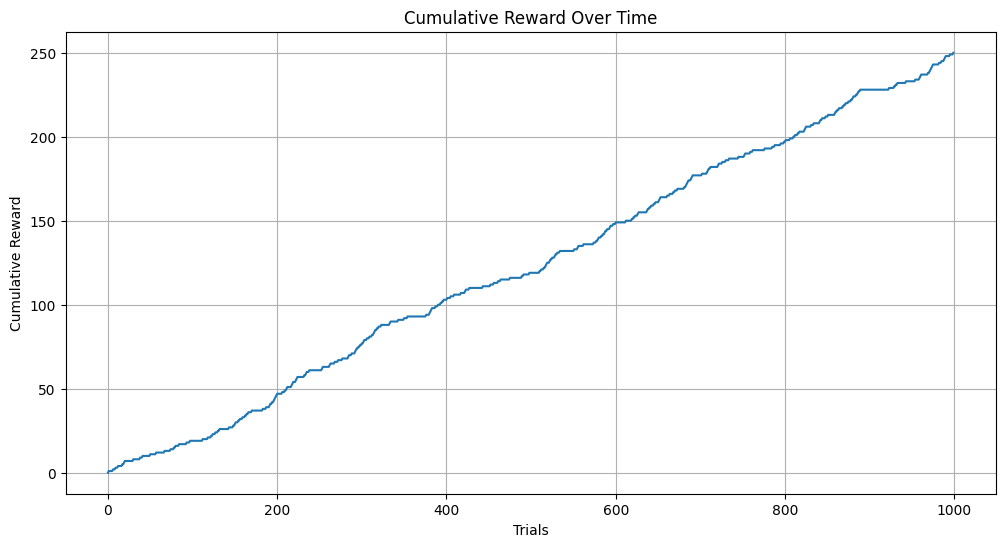

In [7]:
# Cumulative Reward Over Time
'''This shows how the total reward accumulates as we pull more arms.'''
plt.figure(figsize=(12, 6))
plt.plot(cumulative_rewards)
plt.xlabel('Trials')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward Over Time')
plt.grid()
plt.show()

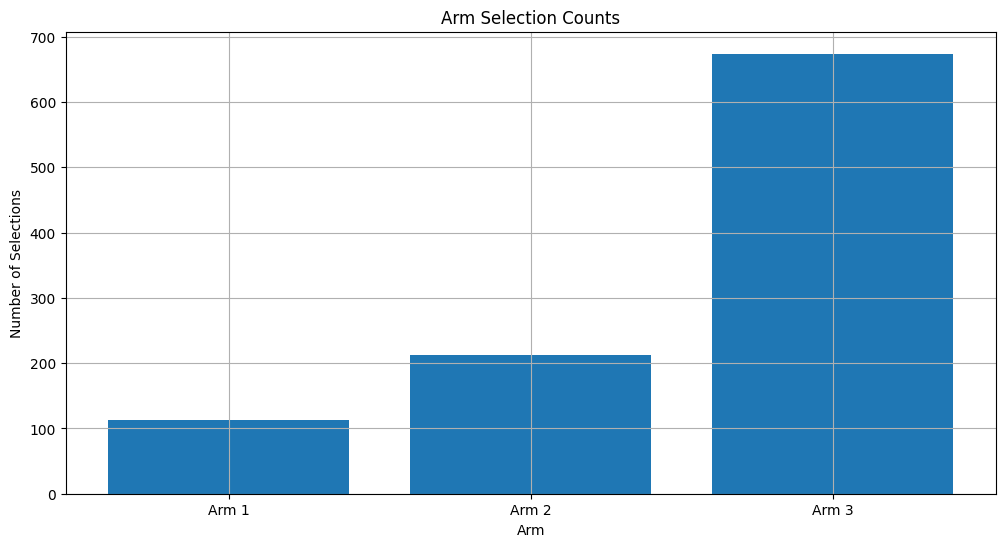

In [8]:
# Arm Selection Counts
'''This will show how often each arm was selected explains the exploration and exploitation problem'''
plt.figure(figsize=(12, 6))
plt.bar(range(n_arms), bandit.counts)
plt.xlabel('Arm')
plt.ylabel('Number of Selections')
plt.title('Arm Selection Counts')
plt.xticks(range(n_arms), ['Arm 1', 'Arm 2', 'Arm 3'])
plt.grid()
plt.show()

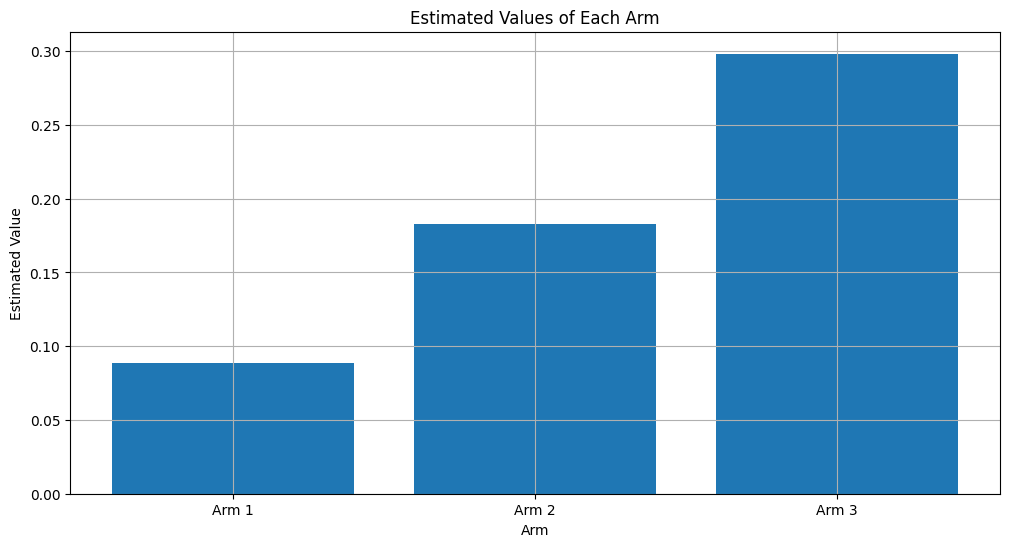

In [9]:
# Estimated Values of Each Arm
'''This shows how the algorithm's estimate of the reward probabilities for each arm evolves over time.'''
plt.figure(figsize=(12, 6))
plt.bar(range(n_arms), bandit.values)
plt.xlabel('Arm')
plt.ylabel('Estimated Value')
plt.title('Estimated Values of Each Arm')
plt.xticks(range(n_arms), ['Arm 1', 'Arm 2', 'Arm 3'])
plt.grid()
plt.show()

### Comparision between UCB and Epsilon Greedy

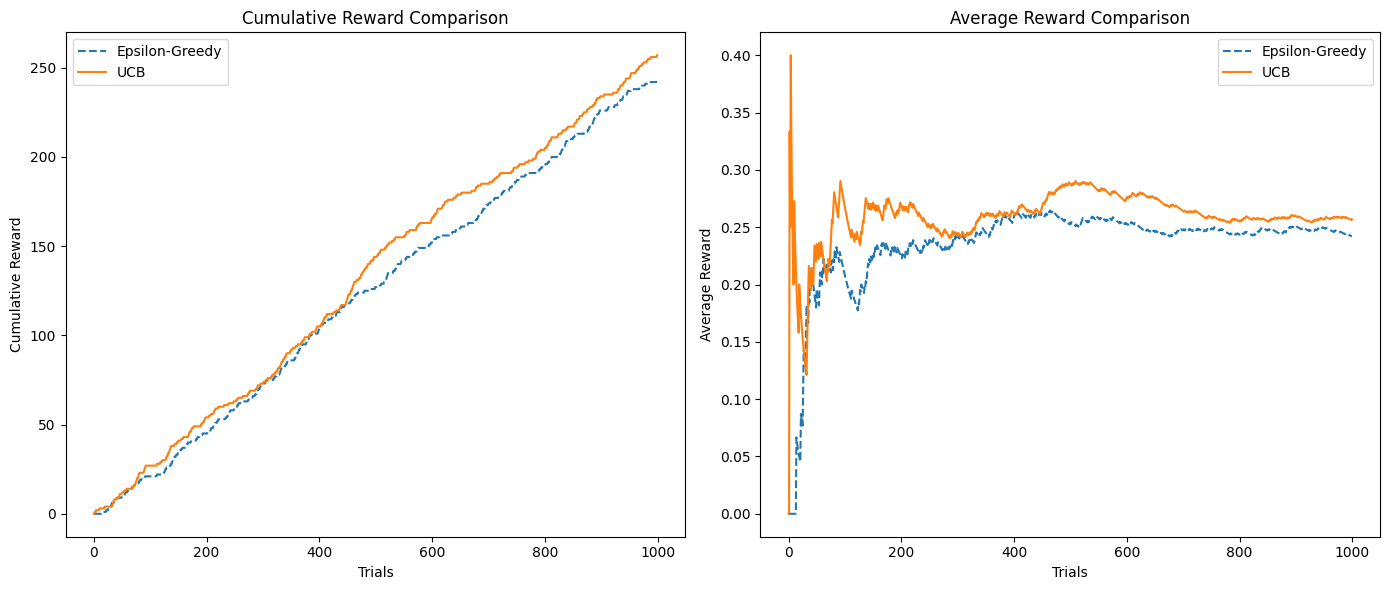

In [11]:
# Epsilon-Greedy Bandit Implementation
class EpsilonGreedyBandit:
    def __init__(self, n_arms, epsilon):
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)

    def select_arm(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, self.n_arms)
        else:
            return np.argmax(self.values)

    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        new_value = ((n - 1) / n) * value + (1 / n) * reward
        self.values[chosen_arm] = new_value

# UCB Bandit Implementation
class UCBBandit:
    def __init__(self, n_arms):
        self.n_arms = n_arms
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)
        self.total_counts = 0

    def select_arm(self):
        if self.total_counts < self.n_arms:
            return self.total_counts
        ucb_values = self.values + np.sqrt(2 * np.log(self.total_counts) / (self.counts + 1e-5))
        return np.argmax(ucb_values)

    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] += 1
        self.total_counts += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        new_value = ((n - 1) / n) * value + (1 / n) * reward
        self.values[chosen_arm] = new_value

# Simulation Function
def simulate_bandit(n_arms, n_trials, epsilon, true_rewards):
    bandit_epsilon = EpsilonGreedyBandit(n_arms, epsilon)
    bandit_ucb = UCBBandit(n_arms)

    rewards_epsilon = np.zeros(n_trials)
    cumulative_rewards_epsilon = np.zeros(n_trials)
    selected_arms_epsilon = np.zeros(n_trials)

    rewards_ucb = np.zeros(n_trials)
    cumulative_rewards_ucb = np.zeros(n_trials)
    selected_arms_ucb = np.zeros(n_trials)

    for t in range(n_trials):
        # Epsilon-Greedy
        chosen_arm_epsilon = bandit_epsilon.select_arm()
        reward_epsilon = int(np.random.rand() < true_rewards[chosen_arm_epsilon])
        bandit_epsilon.update(chosen_arm_epsilon, reward_epsilon)
        rewards_epsilon[t] = reward_epsilon
        cumulative_rewards_epsilon[t] = rewards_epsilon[:t+1].sum()
        selected_arms_epsilon[t] = chosen_arm_epsilon

        # UCB
        chosen_arm_ucb = bandit_ucb.select_arm()
        reward_ucb = int(np.random.rand() < true_rewards[chosen_arm_ucb])
        bandit_ucb.update(chosen_arm_ucb, reward_ucb)
        rewards_ucb[t] = reward_ucb
        cumulative_rewards_ucb[t] = rewards_ucb[:t+1].sum()
        selected_arms_ucb[t] = chosen_arm_ucb

    return (rewards_epsilon, cumulative_rewards_epsilon, selected_arms_epsilon, bandit_epsilon,
            rewards_ucb, cumulative_rewards_ucb, selected_arms_ucb, bandit_ucb)

# Parameters
n_arms = 3
n_trials = 1000
epsilon = 0.3
true_rewards = [0.1, 0.2, 0.3]

# Simulation
(rewards_epsilon, cumulative_rewards_epsilon, selected_arms_epsilon, bandit_epsilon,
 rewards_ucb, cumulative_rewards_ucb, selected_arms_ucb, bandit_ucb) = simulate_bandit(n_arms, n_trials, epsilon, true_rewards)

# Plotting
plt.figure(figsize=(14, 6))

# Cumulative Rewards Plot
plt.subplot(1, 2, 1)
plt.plot(cumulative_rewards_epsilon, label='Epsilon-Greedy', linestyle='--')
plt.plot(cumulative_rewards_ucb, label='UCB')
plt.xlabel('Trials')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward Comparison')
plt.legend()

# Average Reward Plot
plt.subplot(1, 2, 2)
plt.plot(np.cumsum(rewards_epsilon) / (np.arange(n_trials) + 1), label='Epsilon-Greedy', linestyle='--')
plt.plot(np.cumsum(rewards_ucb) / (np.arange(n_trials) + 1), label='UCB')
plt.xlabel('Trials')
plt.ylabel('Average Reward')
plt.title('Average Reward Comparison')
plt.legend()

plt.tight_layout()
plt.show()

### Different Bands and Comparision

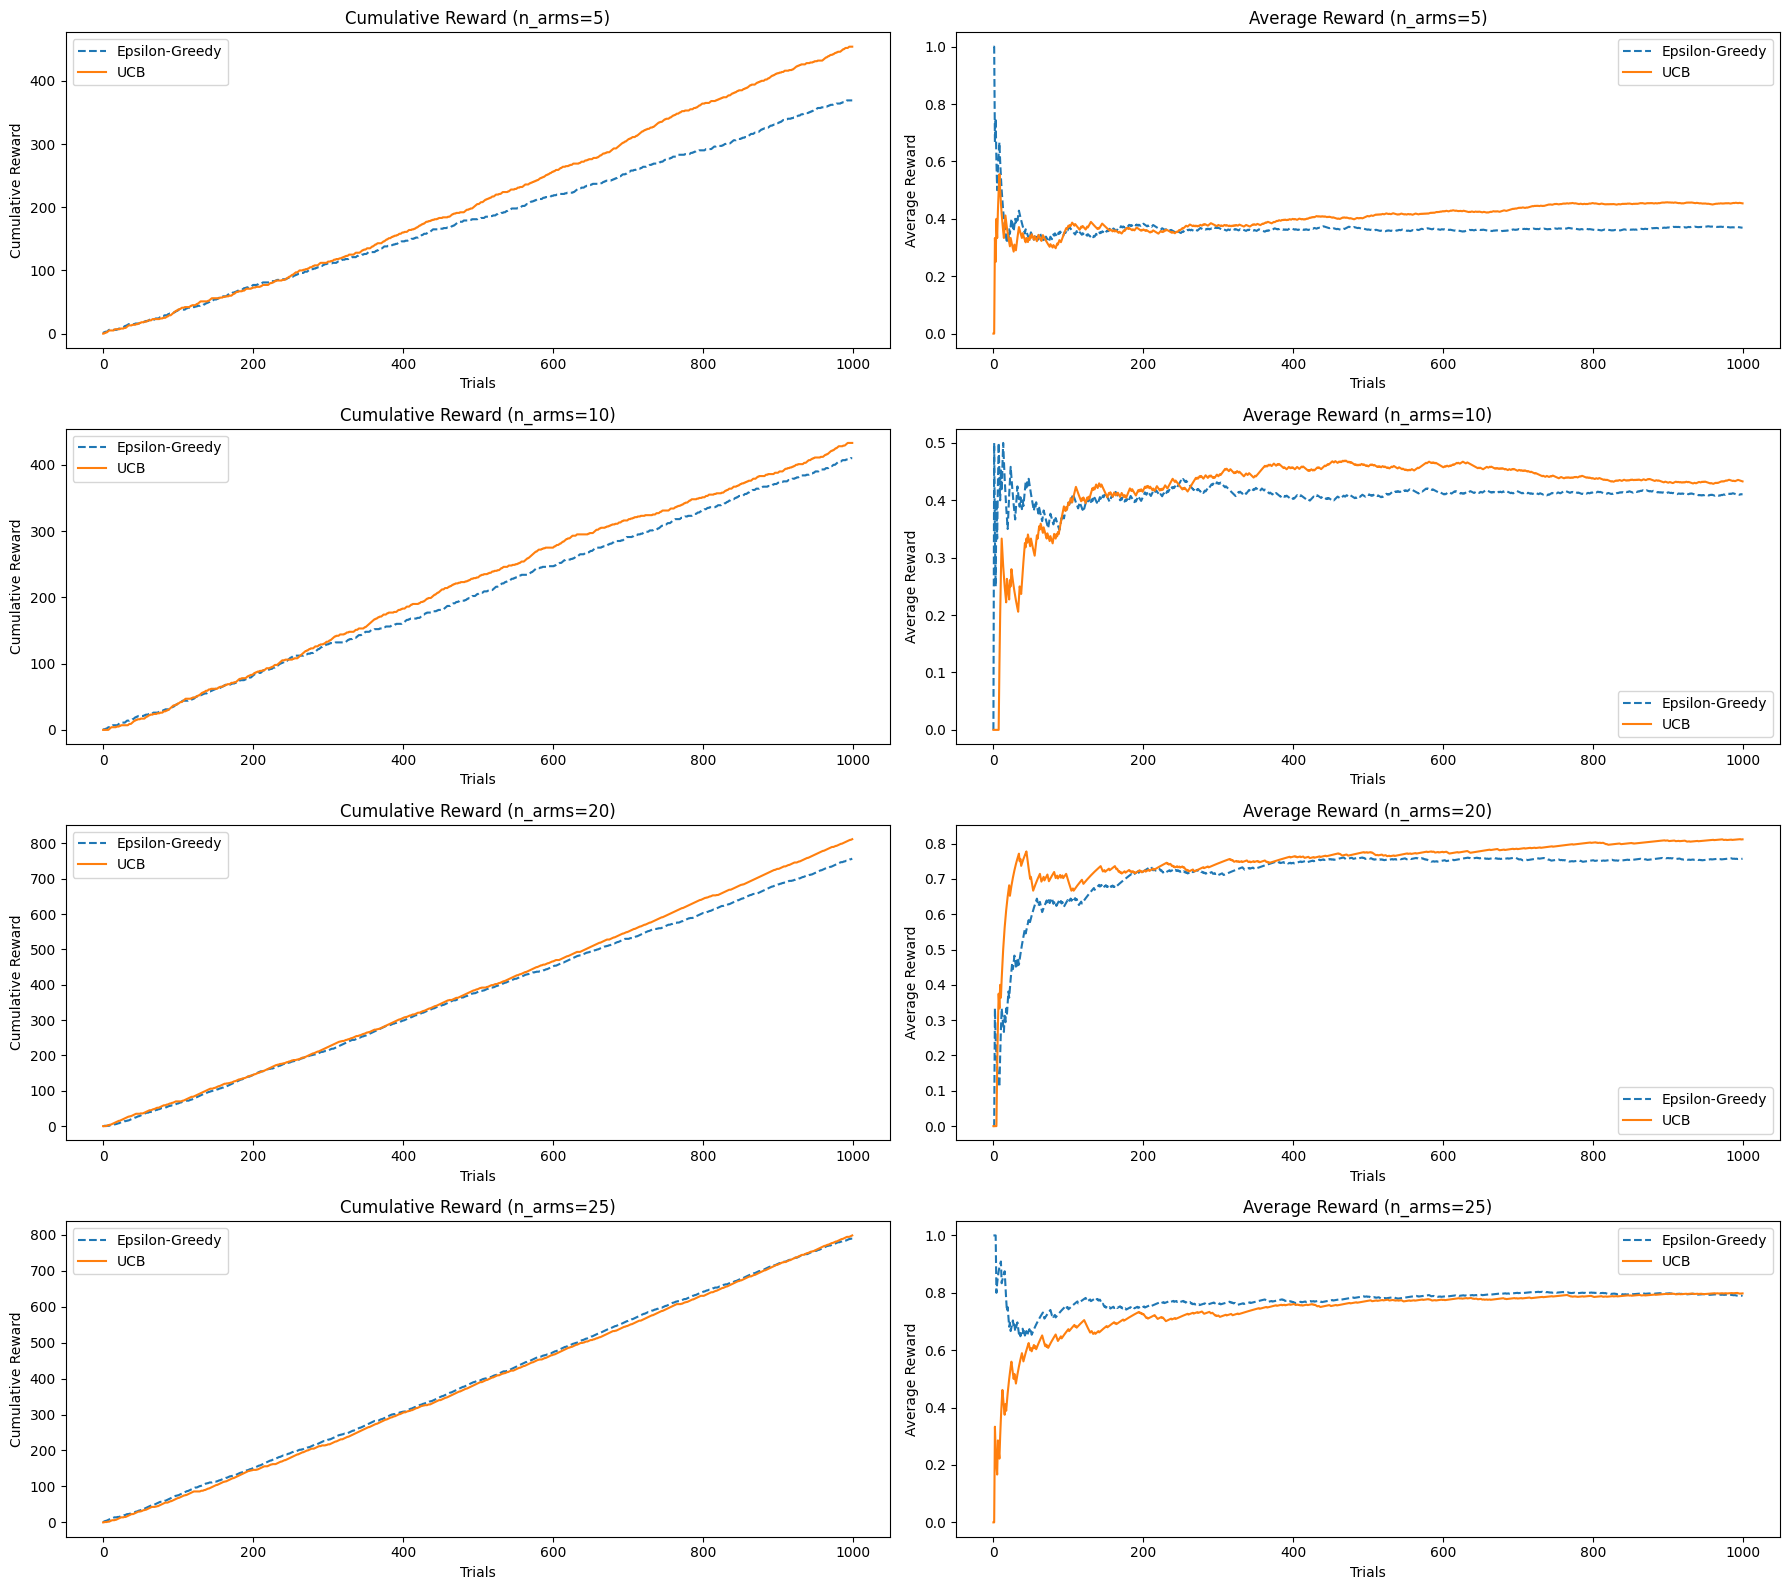

In [20]:
# Epsilon-Greedy Bandit Implementation
class EpsilonGreedyBandit:
    def __init__(self, n_arms, epsilon):
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)

    def select_arm(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, self.n_arms)
        else:
            return np.argmax(self.values)

    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        new_value = ((n - 1) / n) * value + (1 / n) * reward
        self.values[chosen_arm] = new_value

# UCB Bandit Implementation
class UCBBandit:
    def __init__(self, n_arms):
        self.n_arms = n_arms
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)
        self.total_counts = 0

    def select_arm(self):
        if self.total_counts < self.n_arms:
            return self.total_counts
        ucb_values = self.values + np.sqrt(2 * np.log(self.total_counts) / (self.counts + 1e-5))
        return np.argmax(ucb_values)

    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] += 1
        self.total_counts += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        new_value = ((n - 1) / n) * value + (1 / n) * reward
        self.values[chosen_arm] = new_value

# Simulation Function
def simulate_bandit(n_arms, n_trials, epsilon, true_rewards):
    bandit_epsilon = EpsilonGreedyBandit(n_arms, epsilon)
    bandit_ucb = UCBBandit(n_arms)

    rewards_epsilon = np.zeros(n_trials)
    cumulative_rewards_epsilon = np.zeros(n_trials)
    selected_arms_epsilon = np.zeros(n_trials)

    rewards_ucb = np.zeros(n_trials)
    cumulative_rewards_ucb = np.zeros(n_trials)
    selected_arms_ucb = np.zeros(n_trials)

    for t in range(n_trials):
        # Epsilon-Greedy
        chosen_arm_epsilon = bandit_epsilon.select_arm()
        reward_epsilon = int(np.random.rand() < true_rewards[chosen_arm_epsilon])
        bandit_epsilon.update(chosen_arm_epsilon, reward_epsilon)
        rewards_epsilon[t] = reward_epsilon
        cumulative_rewards_epsilon[t] = rewards_epsilon[:t+1].sum()
        selected_arms_epsilon[t] = chosen_arm_epsilon

        # UCB
        chosen_arm_ucb = bandit_ucb.select_arm()
        reward_ucb = int(np.random.rand() < true_rewards[chosen_arm_ucb])
        bandit_ucb.update(chosen_arm_ucb, reward_ucb)
        rewards_ucb[t] = reward_ucb
        cumulative_rewards_ucb[t] = rewards_ucb[:t+1].sum()
        selected_arms_ucb[t] = chosen_arm_ucb

    return (rewards_epsilon, cumulative_rewards_epsilon, selected_arms_epsilon, bandit_epsilon,
            rewards_ucb, cumulative_rewards_ucb, selected_arms_ucb, bandit_ucb)

# Parameters
n_trials = 1000
epsilon = 0.5

# Number of arms to test
arm_counts = [5, 10, 20, 25]
true_rewards_dict = {
    5: [0.1, 0.2, 0.3, 0.4, 0.5],
    10: [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55],
    20: [0.1 + i*0.05 for i in range(20)],
    25: [0.1 + i*0.04 for i in range(25)]
}

plt.figure(figsize=(18, 16))

for i, n_arms in enumerate(arm_counts):
    true_rewards = true_rewards_dict[n_arms]
    
    # Simulate both methods
    (rewards_epsilon, cumulative_rewards_epsilon, selected_arms_epsilon, bandit_epsilon,
     rewards_ucb, cumulative_rewards_ucb, selected_arms_ucb, bandit_ucb) = simulate_bandit(n_arms, n_trials, epsilon, true_rewards)
    
    # Plotting
    plt.subplot(len(arm_counts), 2, 2*i + 1)
    plt.plot(cumulative_rewards_epsilon, label='Epsilon-Greedy', linestyle='--')
    plt.plot(cumulative_rewards_ucb, label='UCB')
    plt.xlabel('Trials')
    plt.ylabel('Cumulative Reward')
    plt.title(f'Cumulative Reward (n_arms={n_arms})')
    plt.legend()
    
    plt.subplot(len(arm_counts), 2, 2*i + 2)
    plt.plot(np.cumsum(rewards_epsilon) / (np.arange(n_trials) + 1), label='Epsilon-Greedy', linestyle='--')
    plt.plot(np.cumsum(rewards_ucb) / (np.arange(n_trials) + 1), label='UCB')
    plt.xlabel('Trials')
    plt.ylabel('Average Reward')
    plt.title(f'Average Reward (n_arms={n_arms})')
    plt.legend()

plt.tight_layout()
plt.show()
